In [1]:
import pandas as pd
import json
import ast
import operator
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def dict_sort_des(diction):
    sorted_d = sorted(diction.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_d

def clean_tweet(tweet):
    return ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def wordcloud_plot(text, colour):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = colour,
        stopwords = STOPWORDS).generate(str(text))

    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    return plt.show()


In [3]:
df = pd.read_csv('BJP4India_tweets.csv')
# Filtering the retweets by text.
df =  df[~df.text.str.contains("RT")]
df

,id,created_at,text,retweet_count,favorite_count,photos,videos,url,hashes
0,1116322959956697093,2019-04-11 12:51:48,Mamata Didi wants to impose Urdu over Bengali ...,250,743,0,1,1,"[{u'indices': [238, 254], u'text': u'NaMoForNe..."
1,1116320552761749505,2019-04-11 12:42:14,Mamata Banerjee’s TMC stands for \n\nT : 'Tush...,239,705,0,1,1,"[{u'indices': [176, 192], u'text': u'NaMoForNe..."
2,1116318097034469376,2019-04-11 12:32:29,Congress stalled the Assam Accord for three de...,258,766,0,1,1,"[{u'indices': [229, 245], u'text': u'NaMoForNe..."
3,1116312258169016320,2019-04-11 12:09:17,"A new scam, Tughlak road election scam, has be...",458,1101,0,1,1,"[{u'indices': [265, 281], u'text': u'NaMoForNe..."
4,1116296458439761920,2019-04-11 11:06:30,"कांग्रेस का हाथ विकास के साथ नहीं है, सिर्फ भ्...",221,794,0,0,0,"[{u'indices': [151, 167], u'text': u'NaMoForNe..."
5,1116296194647400449,2019-04-11 11:05:27,We are committed to balanced development of As...,162,504,0,0,0,"[{u'indices': [186, 202], u'text': u'NaMoForNe..."
6,1116296089244557312,2019-04-11 11:05:02,तीन तलाक कानून पर भी मैं दो टूक बात करना चाहता...,342,1173,0,0,0,"[{u'indices': [197, 213], u'text': u'NaMoForNe..."
7,1116295959065980930,2019-04-11 11:04:31,कांग्रेस के नेता मुझे शौचालय का चौकीदार बोलते ...,422,1826,0,0,0,"[{u'indices': [150, 166], u'text': u'NaMoForNe..."
8,1116295774218833926,2019-04-11 11:03:47,सोने का चम्मच लेकर पैदा हुए लोग सिर्फ चाय का स...,360,1390,0,0,0,"[{u'indices': [206, 222], u'text': u'NaMoForNe..."
9,1116294230052184064,2019-04-11 10:57:38,We are committed to implementing Citizen Amend...,185,524,2,0,1,"[{u'indices': [130, 146], u'text': u'NaMoForNe..."


In [4]:
k = df[df['favorite_count']==df['favorite_count'].max()]
pd.set_option('display.max_colwidth', -1)
k

,id,created_at,text,retweet_count,favorite_count,photos,videos,url,hashes
1804,1110886268408233984,2019-03-27 12:48:20,Congress led UPA\nSurgical Strike : Don't do it\nAir Strike: Don't do it\nA-SAT Missile: Don't do it\n\nModi Sarkar\nSurgical Strike: Go For It\nAir Strike: Go For It\nA-SAT Missile: Go For It\n\nModi Hai To Mumkin Hai. #MissionShakti,13821,43525,0,0,0,"[{u'indices': [210, 224], u'text': u'MissionShakti'}]"


In [5]:
k = df[df['retweet_count']==df['retweet_count'].max()]
pd.set_option('display.max_colwidth', -1)
k

,id,created_at,text,retweet_count,favorite_count,photos,videos,url,hashes
705,1114495595421376512,2019-04-06 11:50:30,आज तक ने प्रधानमंत्री श्री नरेन्द्र मोदी के भाषण पर दिखाई गलत खबर।\n\nआखिर क्यों? https://t.co/U2KZlMFf7b,18116,37735,0,1,1,[]


## Algorithm for popularity -> retweet_count(0.7) + favourite_count(0.3) ->score

In [6]:
k = df[(df['retweet_count']*0.7 + df['favorite_count']*0.3)==(df['retweet_count']*0.7+df['favorite_count']*0.3).max()]
pd.set_option('display.max_colwidth', -1)
k

,id,created_at,text,retweet_count,favorite_count,photos,videos,url,hashes
705,1114495595421376512,2019-04-06 11:50:30,आज तक ने प्रधानमंत्री श्री नरेन्द्र मोदी के भाषण पर दिखाई गलत खबर।\n\nआखिर क्यों? https://t.co/U2KZlMFf7b,18116,37735,0,1,1,[]


In [7]:
hash_dict ={}
for k in df['hashes']:
    if 'text' in k:
        l = k.strip('[')
        l = l.strip(']')
        m = ast.literal_eval(l)
        if (type(m))  == dict:
            j = (m['text'])
            if j not in hash_dict.keys():
                hash_dict[j] = 1
            else:
                hash_dict[j] += 1
        else:
            for h in m:
                if (type(m))  == dict:
                    j = (m['text'])
                    if j not in hash_dict.keys():
                        hash_dict[j] = 1
                    else:
                        hash_dict[j] += 1
print(dict_sort_des(hash_dict)[:5])

[('BJPSankalpPatr2019', 139), ('IsBaarNaMoPhirSe', 134), ('IsBaarPhirModi', 121), ('IndiaWithNaMo', 110), ('DeshKeLiyeModi', 102)]


## Indian National Congress

In [8]:
df = pd.read_csv('INCIndia_tweets.csv')
# Filtering the retweets by text.
df =  df[~df.text.str.contains("RT")]
df

,id,created_at,text,retweet_count,favorite_count,photos,videos,url,hashes
1,1116282117405626370,2019-04-11 10:09:30,Congress President @RahulGandhi speaks to the media in Rae Bareli. \n\n#SoniaGandhiRaeBareli https://t.co/Q5ccWisPoa,791,2518,0,1,1,"[{u'indices': [69, 90], u'text': u'SoniaGandhiRaeBareli'}]"
2,1116269243891191808,2019-04-11 09:18:21,Is Modi invincible?\nUPA Chairperson Smt. Sonia Gandhi gives a fitting reply to the media after filing her nomination in Rae Bareli. \n\n#SoniaGandhiRaeBareli https://t.co/bicCCaALAC,727,2085,0,1,1,"[{u'indices': [134, 155], u'text': u'SoniaGandhiRaeBareli'}]"
3,1116265788271259648,2019-04-11 09:04:37,"Four time MP from Rae Bareli, UPA Chairperson Smt. Sonia Gandhi files her nomination for the 2019 Lok Sabha elections. \n\n#SoniaGandhiRaeBareli https://t.co/Yjl3TxOsHm",495,1737,2,0,1,"[{u'indices': [121, 142], u'text': u'SoniaGandhiRaeBareli'}]"
4,1116259069608599553,2019-04-11 08:37:55,UPA Chairperson Smt. Sonia Gandhi at her road show in Rae Bareli before filing her nomination. \n#SoniaGandhiRaeBareli https://t.co/1iLky5LKNM,527,1814,2,0,1,"[{u'indices': [96, 117], u'text': u'SoniaGandhiRaeBareli'}]"
5,1116249506691969024,2019-04-11 07:59:55,The streets of Rae Bareli are filled with love &amp; support for Smt. Sonia Gandhi's nomination. \n\n#SoniaGandhiRaeBareli https://t.co/CVcY0plc2K,955,2749,0,1,1,"[{u'indices': [99, 120], u'text': u'SoniaGandhiRaeBareli'}]"
6,1116247776763867136,2019-04-11 07:53:03,Shared moments of a Puja ahead of Smt. Sonia Gandhi's nomination today. \n\n#SoniaGandhiRaeBareli https://t.co/7S9SPDUMEC,987,4526,2,0,1,"[{u'indices': [74, 95], u'text': u'SoniaGandhiRaeBareli'}]"
7,1116244919956332545,2019-04-11 07:41:42,"UPA Chairperson Smt. Sonia Gandhi, Congress President @RahulGandhi &amp; GS I/c UP East Smt. @priyankagandhi attend a Puja ahead of Mrs. Gandhi's nomination in Rae Bareli, UP. \n\n#SoniaGandhiRaeBareli https://t.co/l93tpGOfdq",1522,5702,0,1,1,"[{u'indices': [178, 199], u'text': u'SoniaGandhiRaeBareli'}]"
8,1116241950938546176,2019-04-11 07:29:54,"Hundreds of people gather in Rae Bareli today to share their love &amp; support for UPA Chairperson Smt. Sonia Gandhi, ahead of her nomination. https://t.co/G7hzHtQsYR",476,1465,2,0,1,[]
9,1116240536212348933,2019-04-11 07:24:17,"Listen to the song by @RaghavMeattle that perfectly captures the question on every Indian's mind - ""वो दिन कहाँ गए?"" https://t.co/2UZVvDmBuk",417,954,0,1,1,[]
10,1116233896612392965,2019-04-11 06:57:54,"Voting is the right of every citizen, no matter creed or caste. We strongly condemn this violation of fundamental rights &amp; urge the EC to take action. https://t.co/txTScA5AeT",376,831,2,0,1,[]


1480 tweets consist of images.


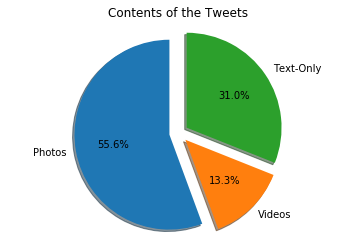

In [9]:
p_count = 0
for k in df['photos']:
    if k>0:
        p_count += 1
print(str(p_count) + ' tweets consist of images.')

v_count = 0
for k in df['videos']:
    if k>0:
        v_count += 1

k = df[(df['photos']==0)][(df['videos']==0)]
ot_count =  len(k)
labels = ['Photos','Videos','Text-Only' ]
sizes = [p_count, v_count, ot_count]
explode = (0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('Contents of the Tweets')
plt.show()

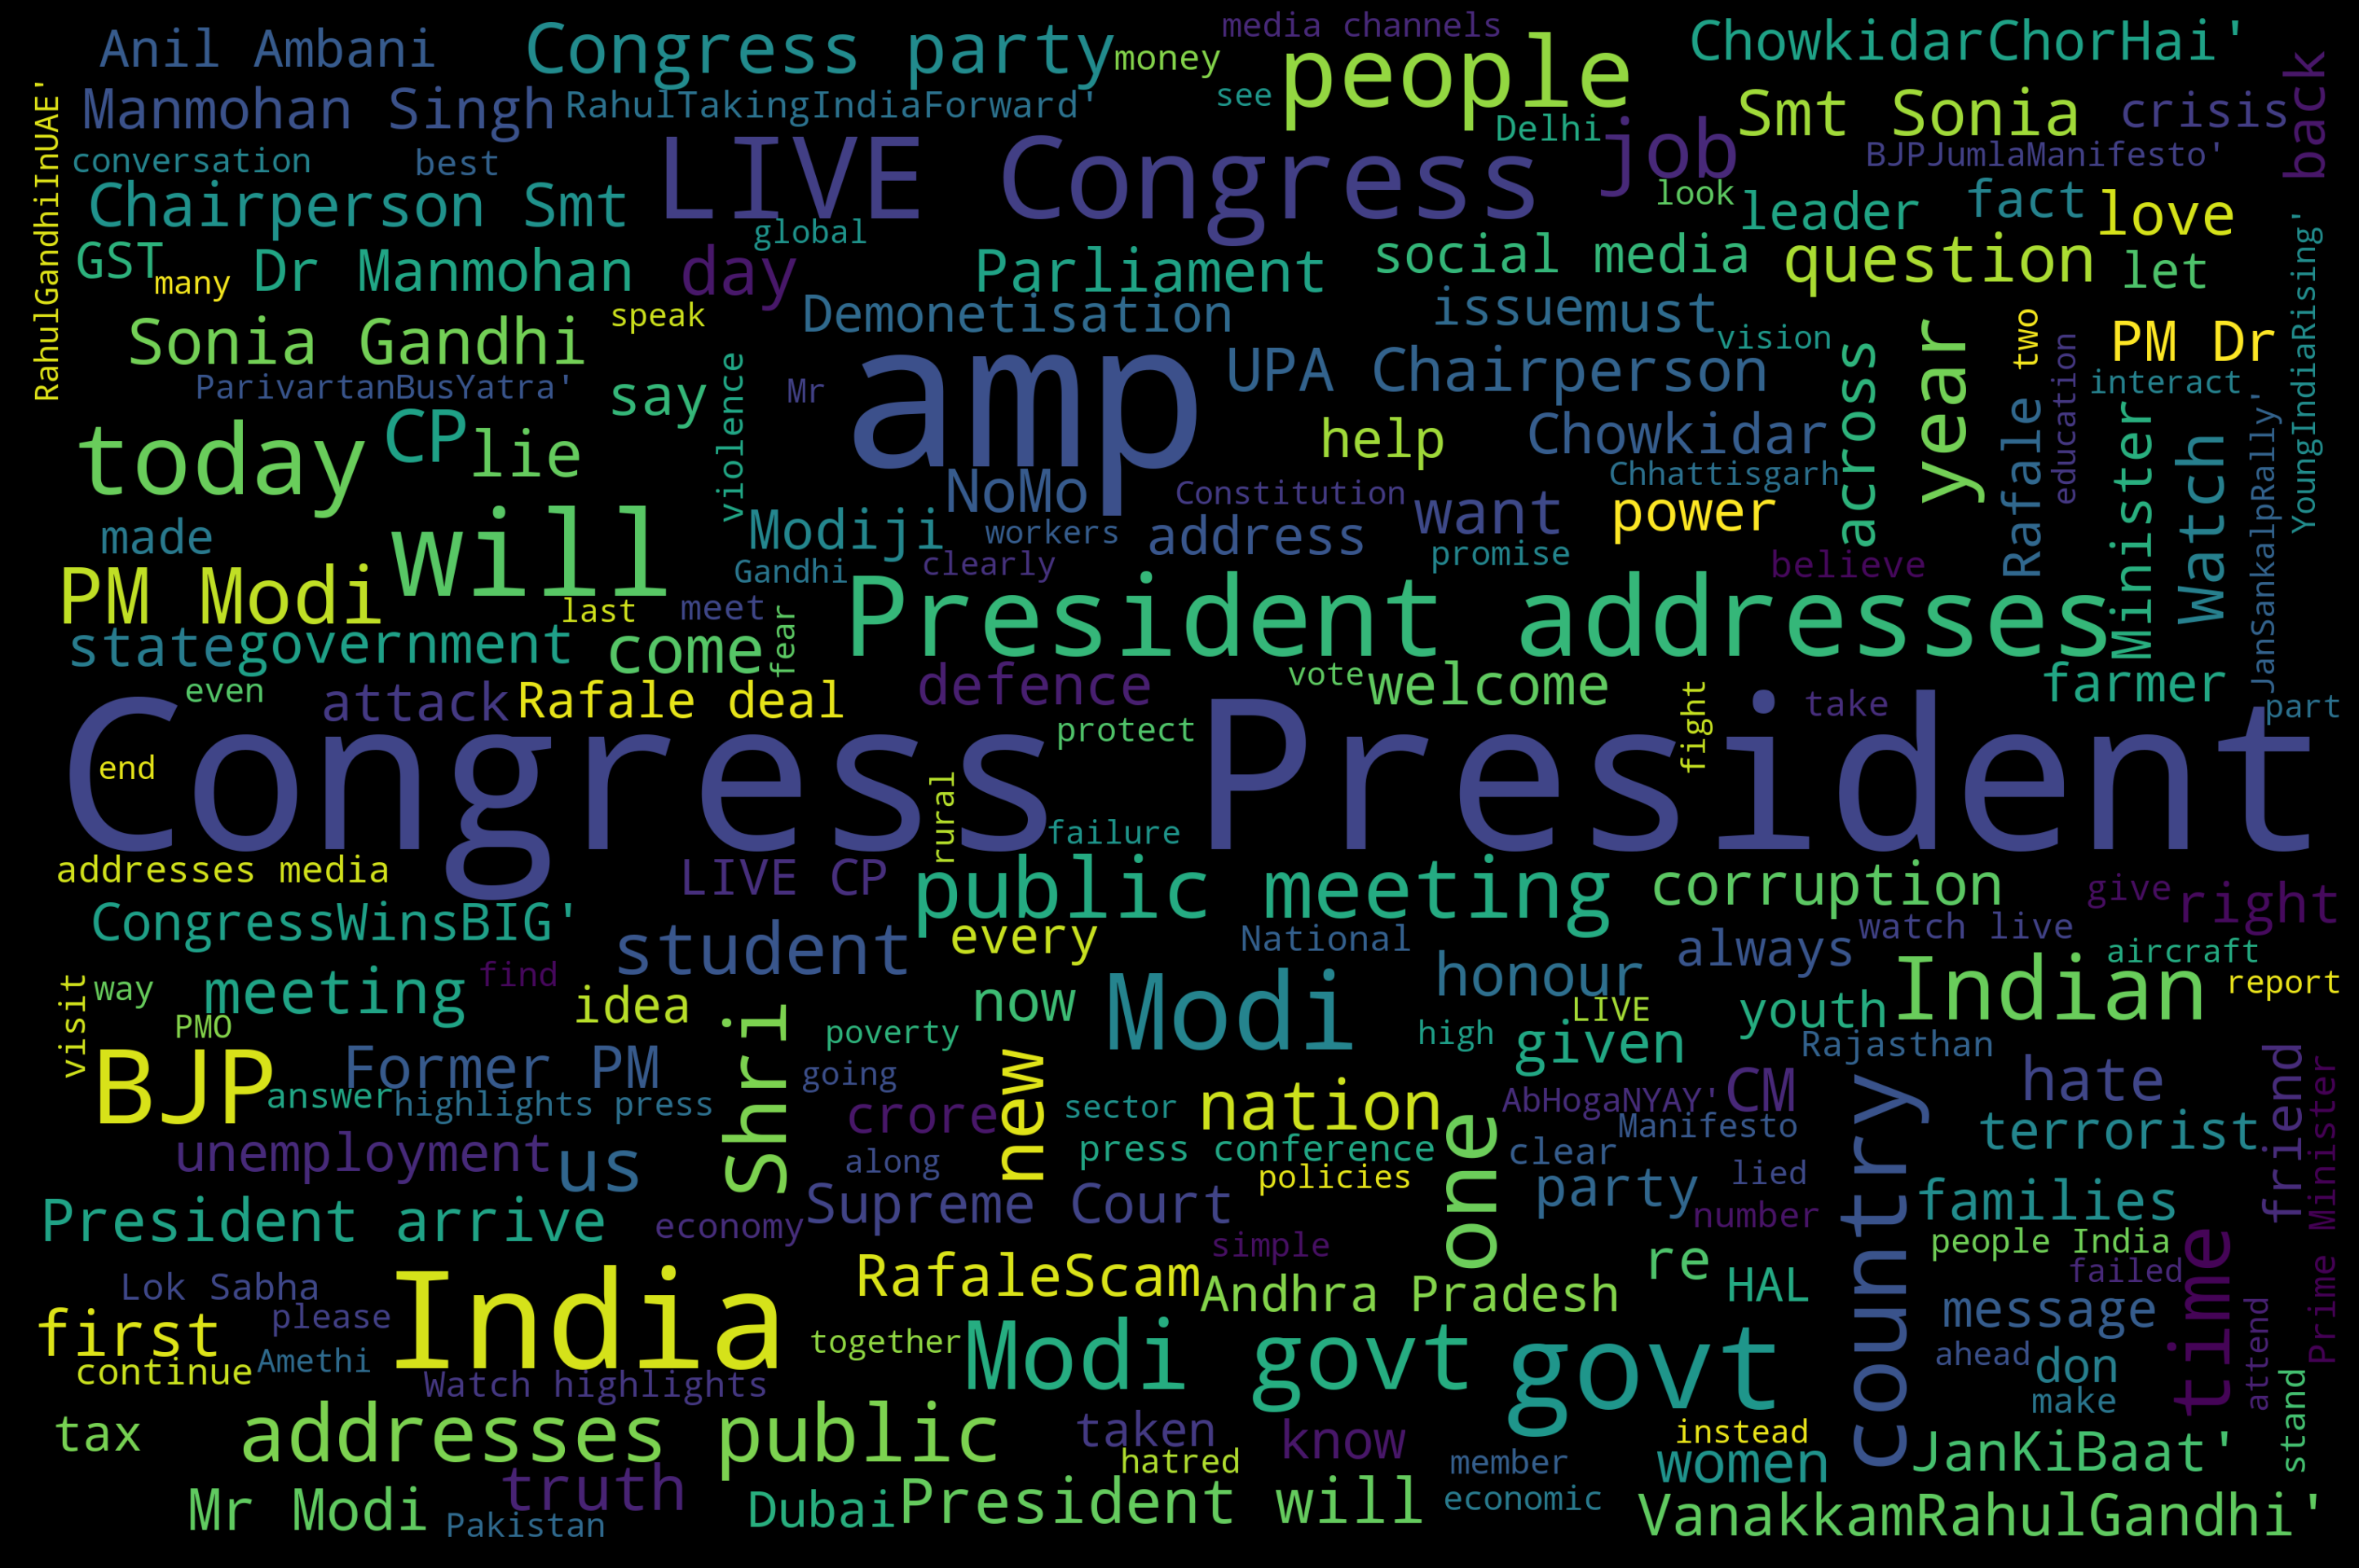

In [10]:
# k = df[(df['retweet_count']*0.7 + df['favorite_count']*0.3)==(df['retweet_count']*0.7+df['favorite_count']*0.3).max()]
j = df.assign(f = df['retweet_count']*0.7 + df['favorite_count']*0.3).sort_values('f').drop('f', axis=1)
j = j.tail(1000)
tweet_words = []
for k in j['text']:
    tweet_words.append(clean_tweet(k))
tweet_words = list(filter(None, tweet_words)) 
wordcloud_plot(tweet_words, 'black')

The words that occur most are:
1. Congress President - Rahul Gandhi, who is an important Prime Ministerial candidate and the president of Congress party.
2. Modi - The popular potential and ex Prime Minister Narendra Modi.
3. Rafale - The deal which is a contraversial aspect of the ruling party.

In [11]:
hash_dict ={}
for k in df['hashes']:
    if 'text' in k:
        l = k.strip('[')
        l = l.strip(']')
        m = ast.literal_eval(l)
        if (type(m))  == dict:
            j = (m['text'])
            if j not in hash_dict.keys():
                hash_dict[j] = 1
            else:
                hash_dict[j] += 1
        else:
            for h in m:
                if (type(m))  == dict:
                    j = (m['text'])
                    if j not in hash_dict.keys():
                        hash_dict[j] = 1
                    else:
                        hash_dict[j] += 1
print(dict_sort_des(hash_dict)[:5])

[('NammaRahulGandhi', 56), ('TelanganasProgressWithCongress', 45), ('YoungIndiaRising', 43), ('VanakkamRahulGandhi', 41), ('JanSankalpRally', 38)]
